# Sarcasm and Irony detection
### Classical algorithms: SGDC, Decision Tree and KNN

Dataset reference: https://www.kaggle.com/datasets/nikhiljohnk/tweets-with-sarcasm-and-irony

Name: Lucrezia Labardi

#### Import of libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
import os
print(sklearn.__version__)

1.3.0


In [2]:
df = pd.read_csv("train.csv") 
df.shape

(81408, 2)

In [3]:
df_test = pd.read_csv('test.csv', encoding='utf-8')
df_test.shape

(8128, 2)

In [4]:
df.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [5]:
df_test.head()

,tweets,class
0,no one ever predicted this was going to happen...,figurative
1,@Stooshie its as closely related as Andrews or...,figurative
2,I find it ironic when Vegans say they love foo...,figurative
3,Quick rt that throwing money vine I've not see...,figurative
4,"yep, keep adding me to your #devops lists.... ...",figurative


#### Check missing and duplicated values

In [6]:
df.isna().sum()

tweets    0
class     0
dtype: int64

In [7]:
df_test.isna().sum()

tweets    2
class     9
dtype: int64

In [8]:
df.duplicated().sum()

49

In [9]:
df_test.duplicated().sum()

1

In [10]:
# remove duplicates and nan
df = df.drop_duplicates().reset_index(drop=True)
df_test = df_test.drop_duplicates().reset_index(drop=True)
df_test = df_test.dropna().reset_index(drop=True)

In [11]:
print(f"Train:{df.shape}")
print(f"Test:{df_test.shape}")

Train:(81359, 2)
Test:(8119, 2)


In [12]:
df["class"].value_counts() #well balanced

figurative    21235
irony         20877
sarcasm       20678
regular       18569
Name: class, dtype: int64

In [13]:
df_test["class"].value_counts() #well balanced

irony         2111
sarcasm       2105
figurative    2044
regular       1859
Name: class, dtype: int64

In [14]:
for el in df["tweets"].sample(20): 
    print(el)

Trichloroethyline is carcinogen &amp; neurotoxin. My uncle escaped its FX during WWII, but was ordered 2use it 2 clean films 4 premieres! #irony
His creation.

#Jesus #Christ #God #Bible #church #christian #prayer #peace #believer  #ho… http://t.co/bbQZ5sCqmn http://t.co/dW5lntIbwo
@BloombergTV @bpolitics Why focus on something meaninful when you can focus on the superficial? #sarcasm
‘Spice’ drug #amnesty tackles violence epidemic in prisons @francescrook Often nonusers are coerced to hold #drugs http://t.co/EWav57FtXc
Vintage 1980's Button Front Pocketed Sleeveless by TheBohoHippie http://t.co/C9tO48902Z via @Etsy #etsy #boho #hippie # vintage #jean #peace
You sooth my soul and allow me to reflect! #love #sunset #Vancouver #peace #beauty #solace #gratitude… https://t.co/1LaHYECH09
This is going to be fun! RSVP (http://t.co/CNKTUL9UpL ) &amp; invite your friends for our #GOPdebate watch party! http://t.co/HIGgNDPOWl
How dare you inject the full truth @ShaneDoherty9 ? Not afraid of bei

#### Normalize text and find new features

In [15]:
import re

def normalize_tweet(text):
    # find tags 
    tags = re.findall(r'@\w+', text)
    # find url
    urls = re.findall(r'https?://\S+', text)
    
    for url in urls:
        text = text.replace(url, "")
    for tag in tags:
        text = text.replace(tag, "")
    
    # all lower case
    text = text.lower()
    text = text.strip()      
    
    if len(text) == 0:
        text = None
    return text, urls, tags

In [16]:
df[["text", "url", "tags"]] = df["tweets"].apply(normalize_tweet).apply(pd.Series)
df_test[["text", "url", "tags"]] = df_test["tweets"].apply(normalize_tweet).apply(pd.Series)

In [17]:
df.head()

,tweets,class,text,url,tags
0,Be aware dirty step to get money #staylight ...,figurative,be aware dirty step to get money #staylight ...,[https://t.co/Oj6BdyX3WG],[]
1,#sarcasm for #people who don't understand #diy...,figurative,#sarcasm for #people who don't understand #diy...,[http://t.co/rtyYmuDVUS],[]
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,#dailymail readers being sensible as always #s...,[],"[@IminworkJeremy, @medsingle]"
3,@wilw Why do I get the feeling you like games?...,figurative,why do i get the feeling you like games? #sarcasm,[],[@wilw]
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,- you probably just missed the text. #sarcastic,[],"[@TeacherArthurG, @rweingarten]"


In [18]:
df.isna().sum()

tweets    0
class     0
text      5
url       0
tags      0
dtype: int64

In [19]:
df_test.isna().sum()

tweets    0
class     0
text      0
url       0
tags      0
dtype: int64

In [20]:
#remove empty texts
df = df.dropna().reset_index(drop=True)

In [21]:
def count_hash(text):
    # number of hashtags
    hashtags = re.findall(r'\#\w+', text)
    return len(hashtags)

def has_url(list_url):
    if len(list_url)>0:
        return 1
    return 0

def count_tags(list_tag):
    # number of tags
    return len(list_tag)

In [22]:
df["num_hashtags"] = df["text"].apply(count_hash)
df["tags"] = df["tags"].apply(count_tags)
df["url"] = df["url"].apply(has_url)

df_test["num_hashtags"] = df_test["text"].apply(count_hash)
df_test["tags"] = df_test["tags"].apply(count_tags)
df_test["url"] = df_test["url"].apply(has_url)

In [23]:
df.head()

,tweets,class,text,url,tags,num_hashtags
0,Be aware dirty step to get money #staylight ...,figurative,be aware dirty step to get money #staylight ...,1,0,4
1,#sarcasm for #people who don't understand #diy...,figurative,#sarcasm for #people who don't understand #diy...,1,0,4
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,#dailymail readers being sensible as always #s...,0,2,6
3,@wilw Why do I get the feeling you like games?...,figurative,why do i get the feeling you like games? #sarcasm,0,1,1
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,- you probably just missed the text. #sarcastic,0,2,1


In [24]:
#pip install emoji-data
from emoji_data import EmojiSequence

def count_emojis(text):
    emoji_count = 0
    for character in text:
        if character in EmojiSequence:
            emoji_count += 1
    return emoji_count

df["emojis"] = df["text"].apply(count_emojis)
df_test["emojis"] = df_test["text"].apply(count_emojis)

In [25]:
def get_special_char(text):
    #pattern for \n new line -> remove it
    newline = re.compile(r'\n')
    text = newline.sub('', text)
    #pattern for special charachetrs (e.g. &amp;) -> count and remove
    special_char = re.compile(r'&[^;]*;')
    num_spec = special_char.findall(text)
    num_spec = len(num_spec)
    text = special_char.sub('', text)
    #pattern for !? repeated and or combined
    excl = re.compile(r'[!?]+')
    excl_quest = excl.findall(text)
    num_excl_quest = len(excl_quest)
    #remove emojis
    for character in text:
        if character in EmojiSequence:
            text = text.replace(character, '')
    
    return num_spec, num_excl_quest, text

In [26]:
df[["num_special", "num_excl_quest", "text"]] = df["text"].apply(get_special_char).apply(pd.Series)
df_test[["num_special", "num_excl_quest", "text"]] = df_test["text"].apply(get_special_char).apply(pd.Series)

In [27]:
df.head()

,tweets,class,text,url,tags,num_hashtags,emojis,num_special,num_excl_quest
0,Be aware dirty step to get money #staylight ...,figurative,be aware dirty step to get money #staylight ...,1,0,4,0,0,0
1,#sarcasm for #people who don't understand #diy...,figurative,#sarcasm for #people who don't understand #diy...,1,0,4,0,0,0
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,#dailymail readers being sensible as always #s...,0,2,6,0,0,0
3,@wilw Why do I get the feeling you like games?...,figurative,why do i get the feeling you like games? #sarcasm,0,1,1,0,0,1
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,- you probably just missed the text. #sarcastic,0,2,1,0,0,0


In [28]:
for testo in df["text"].sample(50):
    print(testo)

of course it decides to rain this weekend. i'm not trying to hang out and have some fun. like really no. #sarcasm
unheralded: adj - "not previously recognized" #irony
how do they expect hanley to get better if they take him out?  #sarcasm
loving my lenovo laptop right now #notmuchatall #sarcasm
same problem with the state budget. #irony
its such a hard task having to lounge on the sofa with my baby sleeping on me #sarcastic #mummy
huh… alison was the first mooc eh?  #sarcasm  :p
what? did no one see this coming -oh wait - i believe nsgeu may have mentioned it #sarcasm
shooting for stardust: mick rock on photographing bowie: british photographer mick rock has impeccable ...  #peace
#alcohol and #drugs can affect anyone in society as scientist dies from taking drug cocktail -
how to help shatter the class ceiling - elect bernie sanders  #politics
the learning journey match it! counting  #education
people say they dislike fake but criticize me for being chubby. is it me or it smells like 

In [29]:
def clean_text(text): 
    # remove everything but numbers letters and #
    pattern = re.compile(r'[^a-zA-Z0-9#\s]')
    result = pattern.sub('', text)
    if len(result) == 0:
        return None
    return result.strip()

In [30]:
df["text_clean"] = df["text"].apply(clean_text)
df_test["text_clean"] = df_test["text"].apply(clean_text)

In [31]:
for testo in df["text_clean"].sample(50):
    print(testo)

coming from a nuclear technologys black marketeer  #irony
politicians waste citizens value  #us #constitution #america #fraud #economy #politics
#news #breakingnews #livea belated welcome in france is drawing few migrants
ifr what is this safe way of flying hems you speak of #sarcasm #upyourgamepeople
but i thought it was just an accident#sarcasm
cant wait to go to maidenhell on thursday lolololololololol #sarcasm
#china spends billions making those crappy mcdonalds toys  the #junk kids win at the arcade and we are shocked their market is too #irony
im glad itll be so beautiful when my family visits this weekend   #sarcasm #hot
but dont ever investigate pp cuz they totally follow all laws #notacult #sarcasm
fucking autocorrect i did not do that on purpose #irony
so are you thinking of taking all the jacqui videos and combining them into one id do that myself but #nottechsavvy #irony
tutticontenti #carlyfiorina is the #frontrunner in the attempt to deny #women their necessary and #legal

In [32]:
df["text_clean"].isna().sum()

0

In [33]:
df_test["text_clean"].isna().sum()

0

In [34]:
print(df.columns)
print(df_test.columns)

Index(['tweets', 'class', 'text', 'url', 'tags', 'num_hashtags', 'emojis',
       'num_special', 'num_excl_quest', 'text_clean'],
      dtype='object')
Index(['tweets', 'class', 'text', 'url', 'tags', 'num_hashtags', 'emojis',
       'num_special', 'num_excl_quest', 'text_clean'],
      dtype='object')


#### Patterns in hashtags

In [35]:
df_fig = df[df["class"]=="figurative"]
df_sarc = df[df["class"]=="sarcasm"]
df_iron = df[df["class"]=="irony"]
df_reg = df[df["class"]=="regular"]

In [36]:
def count_hashtags(text):
    # function to count the number of hashtags and save them in a list
    unique_hashtags = []
    hashtags = re.findall(r'\#\w+', text)
    for h in hashtags: 
        unique_hashtags.append(h)
    return unique_hashtags

In [37]:
# merge all tweets of class "figurative", find all hashtags and extracts most common 10
all_text_fig = " ".join(df_fig["text_clean"])
df_fig_hash = count_hashtags(all_text_fig)
fig_hash = pd.Series(df_fig_hash)
fig_hash = fig_hash.value_counts()
top_10_fig_hash = fig_hash[:10]

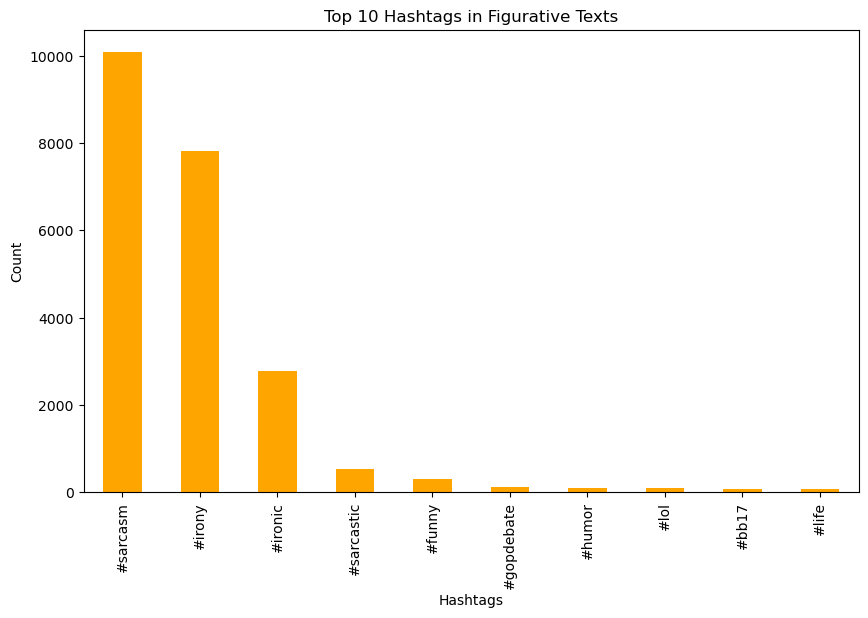

In [38]:
plt.figure(figsize=(10, 6))
top_10_fig_hash.plot(kind='bar', color='orange')
plt.title('Top 10 Hashtags in Figurative Texts')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.show()

In [39]:
# merge all tweets of class "sarcasm", find all hashtags and extracts most common 10
all_text_sarc = " ".join(df_sarc["text_clean"])
df_sarc_hash = count_hashtags(all_text_sarc)
fig_sarc = pd.Series(df_sarc_hash)
fig_sarc = fig_sarc.value_counts()
top_10_sarc_hash = fig_sarc[:10]

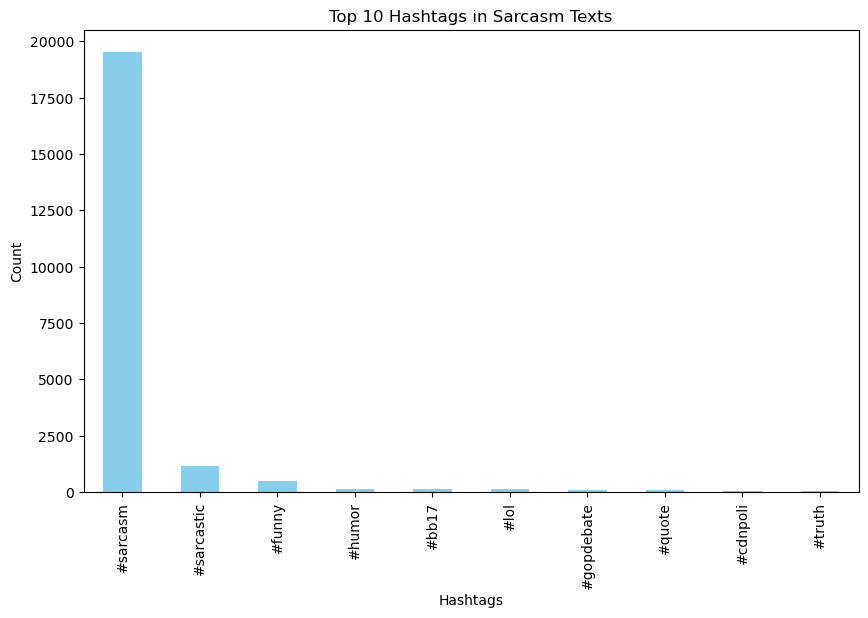

In [40]:
plt.figure(figsize=(10, 6))
top_10_sarc_hash.plot(kind='bar', color='skyblue')
plt.title('Top 10 Hashtags in Sarcasm Texts')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.show()

In [41]:
# merge all tweets of class "irony", find all hashtags and extracts most common 10
all_text_iron = " ".join(df_iron["text"])
df_iron_hash = count_hashtags(all_text_iron)
fig_iron = pd.Series(df_iron_hash)
fig_iron = fig_iron.value_counts()
top_10_iron_hash = fig_iron[:10]

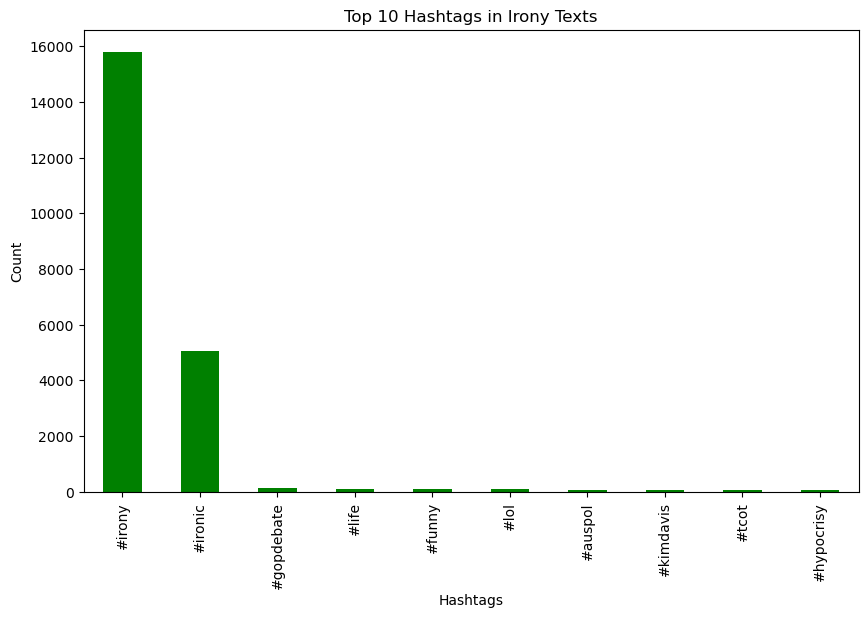

In [42]:
plt.figure(figsize=(10, 6))
top_10_iron_hash.plot(kind='bar', color='green')
plt.title('Top 10 Hashtags in Irony Texts')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.show()

In [43]:
# merge all tweets of class "regular", find all hashtags and extracts most common 10
all_text_reg = " ".join(df_reg["text"])
df_reg_hash = count_hashtags(all_text_reg)
fig_reg = pd.Series(df_reg_hash)
fig_reg = fig_reg.value_counts()
top_10_reg_hash = fig_reg[:10]

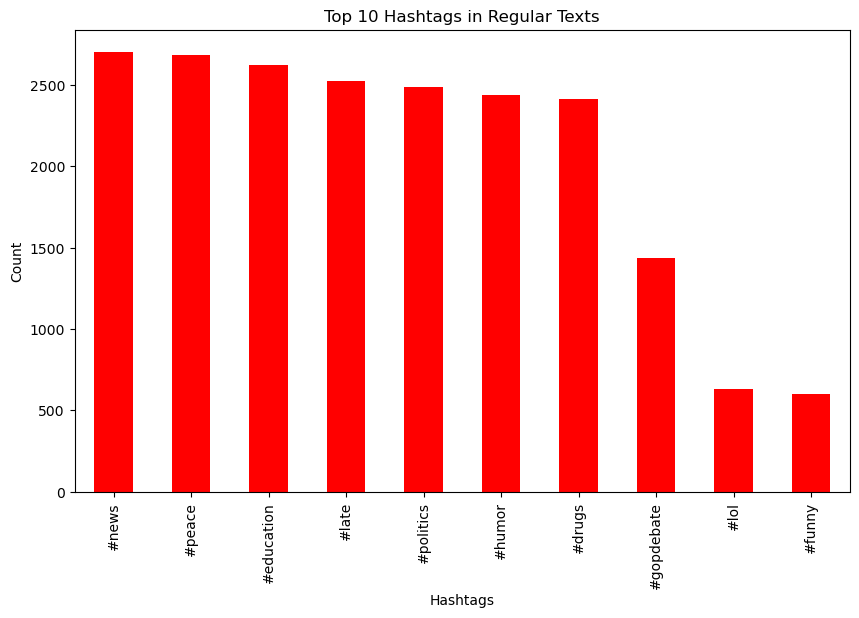

In [44]:
plt.figure(figsize=(10, 6))
top_10_reg_hash.plot(kind='bar', color='red')
plt.title('Top 10 Hashtags in Regular Texts')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

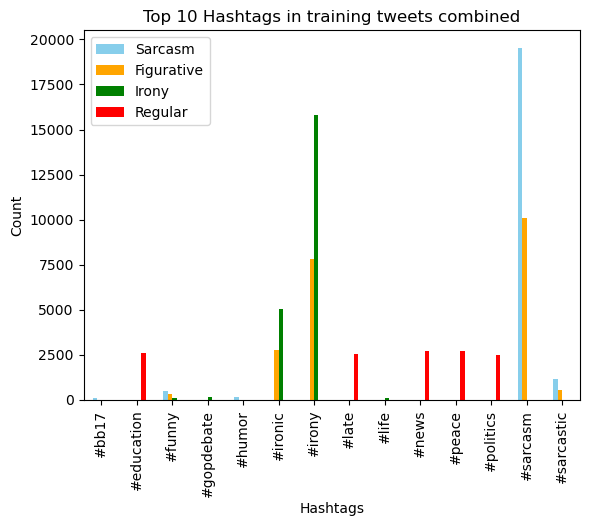

In [45]:
# top five hashtags of all classes in the same graph

combined_top = pd.DataFrame({
    'Sarcasm': top_10_sarc_hash[:5],
    'Figurative': top_10_fig_hash[:5],
    'Irony': top_10_iron_hash[:5],
    'Regular': top_10_reg_hash[:5]
})

plt.figure(figsize=(10,6))
combined_top.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title('Top 10 Hashtags in training tweets combined')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.show()

#### Linguistic features on cleaned text

In [35]:
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    return text

df["text_all_clean"] = df["text_clean"].apply(remove_spl_chars)
df_test["text_all_clean"] = df_test["text_clean"].apply(remove_spl_chars)

In [36]:
df

,tweets,class,text,url,tags,num_hashtags,emojis,num_special,num_excl_quest,text_clean,text_all_clean
0,Be aware dirty step to get money #staylight ...,figurative,be aware dirty step to get money #staylight ...,1,0,4,0,0,0,be aware dirty step to get money #staylight ...,be aware dirty step to get money staylight sta...
1,#sarcasm for #people who don't understand #diy...,figurative,#sarcasm for #people who don't understand #diy...,1,0,4,0,0,0,#sarcasm for #people who dont understand #diy ...,sarcasm for people who dont understand diy art...
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,#dailymail readers being sensible as always #s...,0,2,6,0,0,0,#dailymail readers being sensible as always #s...,dailymail readers being sensible as always sho...
3,@wilw Why do I get the feeling you like games?...,figurative,why do i get the feeling you like games? #sarcasm,0,1,1,0,0,1,why do i get the feeling you like games #sarcasm,why do i get the feeling you like games sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,- you probably just missed the text. #sarcastic,0,2,1,0,0,0,you probably just missed the text #sarcastic,you probably just missed the text sarcastic
...,...,...,...,...,...,...,...,...,...,...,...
81349,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,photo: image via we heart it #childhood #cool...,1,0,4,0,0,0,photo image via we heart it #childhood #cool ...,photo image via we heart it childhood cool fun...
81350,I never knew..I better put this out to the Uni...,sarcasm,i never knew..i better put this out to the uni...,1,0,2,0,0,0,i never knewi better put this out to the unive...,i never knewi better put this out to the unive...
81351,hey just wanted to say thanks @ puberty for le...,sarcasm,hey just wanted to say thanks @ puberty for le...,0,0,2,0,0,0,hey just wanted to say thanks puberty for let...,hey just wanted to say thanks puberty for lett...
81352,I'm sure coverage like the Fox News Special “T...,sarcasm,i'm sure coverage like the fox news special “t...,1,0,1,0,0,0,im sure coverage like the fox news special the...,im sure coverage like the fox news special the...


In [37]:
df_test

,tweets,class,text,url,tags,num_hashtags,emojis,num_special,num_excl_quest,text_clean,text_all_clean
0,no one ever predicted this was going to happen...,figurative,no one ever predicted this was going to happen...,1,0,1,0,0,0,no one ever predicted this was going to happen...,no one ever predicted this was going to happen...
1,@Stooshie its as closely related as Andrews or...,figurative,its as closely related as andrews original cla...,0,1,1,0,0,0,its as closely related as andrews original cla...,its as closely related as andrews original cla...
2,I find it ironic when Vegans say they love foo...,figurative,i find it ironic when vegans say they love foo...,0,0,1,0,0,0,i find it ironic when vegans say they love foo...,i find it ironic when vegans say they love foo...
3,Quick rt that throwing money vine I've not see...,figurative,quick rt that throwing money vine i've not see...,0,0,1,0,0,0,quick rt that throwing money vine ive not seen...,quick rt that throwing money vine ive not seen...
4,"yep, keep adding me to your #devops lists.... ...",figurative,"yep, keep adding me to your #devops lists.... ...",0,0,4,0,0,0,yep keep adding me to your #devops lists #just...,yep keep adding me to your devops lists justsa...
...,...,...,...,...,...,...,...,...,...,...,...
8114,Why yes I will totally submit my photos to a s...,sarcasm,why yes i will totally submit my photos to a s...,0,0,1,0,0,0,why yes i will totally submit my photos to a s...,why yes i will totally submit my photos to a s...
8115,Test on a Saturday! Thank you uni! #sarcasm @ ...,sarcasm,test on a saturday! thank you uni! #sarcasm @ ...,1,0,1,0,0,2,test on a saturday thank you uni #sarcasm gri...,test on a saturday thank you uni sarcasm griff...
8116,Listening to @StephenKing's Misery isn't at al...,sarcasm,listening to 's misery isn't at all disconcert...,0,1,1,0,0,0,listening to s misery isnt at all disconcertin...,listening to s misery isnt at all disconcertin...
8117,@mmcpatt There you go being kind again #sarcas...,sarcasm,there you go being kind again #sarcasm #standu...,0,1,2,0,0,0,there you go being kind again #sarcasm #standu...,there you go being kind again sarcasm standup4...


In [38]:
df.isna().sum()

tweets            0
class             0
text              0
url               0
tags              0
num_hashtags      0
emojis            0
num_special       0
num_excl_quest    0
text_clean        0
text_all_clean    0
dtype: int64

In [39]:
df_test.isna().sum()

tweets            0
class             0
text              0
url               0
tags              0
num_hashtags      0
emojis            0
num_special       0
num_excl_quest    0
text_clean        0
text_all_clean    0
dtype: int64

In [40]:
def ling_feature(text):
    #get tokens of each sentence and count them
    words = text.split()  
    num_words = len(words)
    #get num characheters
    num_char = sum(len(word) for word in words)
    if num_words == 0: 
        return None, None, None
    #get average length of words in each sentence
    average_length = num_char / num_words 
    return num_char, num_words, average_length

In [41]:
df[["n_char", "n_words", "avg_len_words"]] = df["text_all_clean"].apply(ling_feature).apply(pd.Series)
df_test[["n_char", "n_words", "avg_len_words"]] = df_test["text_all_clean"].apply(ling_feature).apply(pd.Series)

In [42]:
df.shape

(81354, 14)

In [43]:
df_test.shape

(8119, 14)

In [44]:
df["class"].value_counts() #well balanced

figurative    21234
irony         20874
sarcasm       20677
regular       18569
Name: class, dtype: int64

In [45]:
df_test["class"].value_counts() #well balanced

irony         2111
sarcasm       2105
figurative    2044
regular       1859
Name: class, dtype: int64

#### Distribution and correlation analysis

<Axes: >

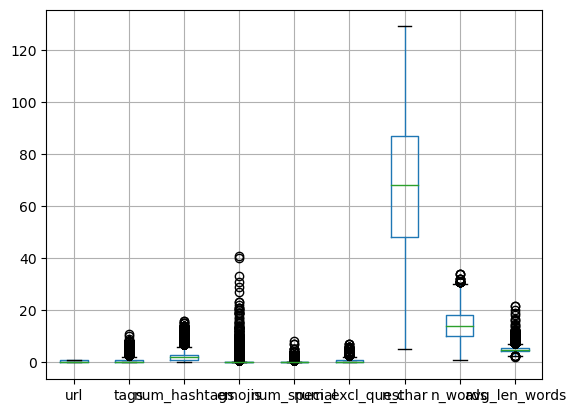

In [57]:
df.boxplot()

<Axes: >

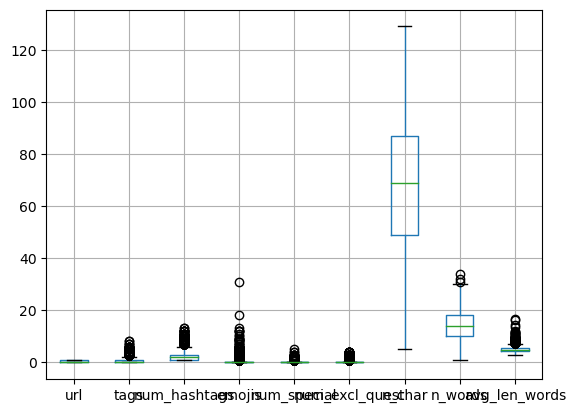

In [58]:
df_test.boxplot()

In [59]:
df["class"].replace({'figurative': 3,'sarcasm': 2, 'irony':1, 'regular': 0}, inplace=True)

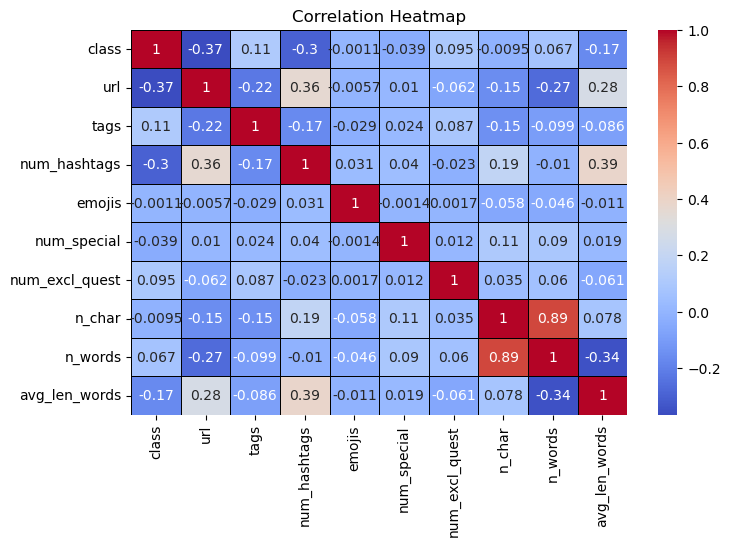

In [60]:
corr_matrix = df.corr(numeric_only=True) 
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

In [61]:
corr_val = df.corr(numeric_only=True)['class']
corr_val.sort_values(ascending=False)

class             1.000000
tags              0.112676
num_excl_quest    0.094640
n_words           0.066735
emojis           -0.001087
n_char           -0.009521
num_special      -0.038739
avg_len_words    -0.166138
num_hashtags     -0.297561
url              -0.365487
Name: class, dtype: float64

The most important features in correlation are the negatively correlated ones. In thins case, the presence of urls, the number of hashtags and a higher average lenght of the words in the sentence are more related to class 0.


### Create train and test set

In [62]:
df["class"].replace({3: 'figurative', 2: 'sarcasm', 1: 'irony', 0: 'regular'}, inplace=True)

In [63]:
y = df["class"]
y_test = df_test["class"]
X = df.drop(columns=['class', 'tweets', 'text', 'text_clean']) 
X_test = df_test.drop(columns=['class', 'tweets', 'text', 'text_clean']) 

X.shape, X_test.shape, y.shape, y_test.shape

((81354, 10), (8119, 10), (81354,), (8119,))

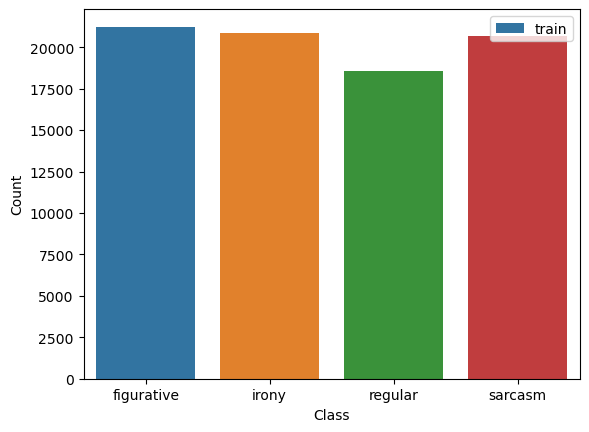

In [64]:
sns.countplot(x = y, label='train')
plt.legend()
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

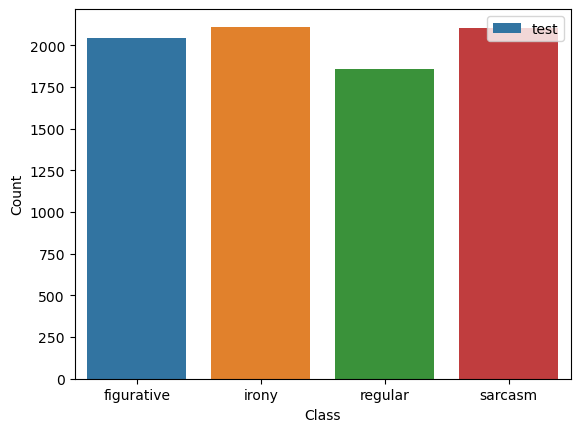

In [65]:
sns.countplot(x = y_test, label='test')
plt.legend()
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

In [66]:
X.columns

Index(['url', 'tags', 'num_hashtags', 'emojis', 'num_special',
       'num_excl_quest', 'text_all_clean', 'n_char', 'n_words',
       'avg_len_words'],
      dtype='object')

### Pipeline with SGDC Classifier

In [67]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#MODELS
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [72]:
count_vect = CountVectorizer() 
scaler = MaxAbsScaler() 

# Numeric features will be imputed and then scaled
numeric_preprocessing = make_pipeline (scaler)

#String features will be encoded with the vectorizer
string_processing = make_pipeline(count_vect)

preprocessor = make_column_transformer(
    (numeric_preprocessing, ['url', 'tags', 'emojis', 'num_hashtags', 'num_special', 'num_excl_quest', 'n_char', 'n_words', 'avg_len_words']),
    (string_processing, "text_all_clean"),
    remainder='drop')

In [73]:
sgcd = SGDClassifier(random_state=42)

pipe = make_pipeline (preprocessor, sgcd)
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  ['url', 'tags', 'emojis',
                                                   'num_hashtags',
                                                   'num_special',
                                                   'num_excl_quest', 'n_char',
                                                   'n_words',
                                                   'avg_len_words']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('countvectorizer',
                                                                   CountVectorizer())]),
                                                  'text_all_clean')])),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [74]:
pipe[:-1].get_feature_names_out()

array(['pipeline-1__url', 'pipeline-1__tags', 'pipeline-1__emojis', ...,
       'pipeline-2__zz', 'pipeline-2__zzzs', 'pipeline-2__zzzzzzz'],
      dtype=object)

In [75]:
params = [{
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdclassifier__loss': ['hinge', 'log_loss', 'perceptron'],
    'columntransformer__pipeline-2__countvectorizer__analyzer': ['word', 'char', 'char_wb']
    }]
gs = GridSearchCV(pipe, params, cv=5, scoring='f1_macro', n_jobs=-1, refit=True, verbose=1)
gs.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('maxabsscaler',
                                                                                          MaxAbsScaler())]),
                                                                         ['url',
                                                                          'tags',
                                                                          'emojis',
                                                                          'num_hashtags',
                                                                          'num_special',
                                                                          'num_excl_quest',
                                                                          'n_char',
                                                                          'n_words',
                                                                          'avg_len_words']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('countvectorizer',
                                                                                          CountVectorizer())]),
                                                                         'text_all_clean')])),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'columntransformer__pipeline-2__countvectorizer__analyzer': ['word',
                                                                                       'char',
                                                                                       'char_wb'],
                          'sgdclassifier__loss': ['hinge', 'log_loss',
                                                  'perceptron'],
                          'sgdclassifier__penalty': ['l2', 'l1',
                                                     'elasticnet']}],
             scoring='f1_macro', verbose=1)

In [76]:
gs.best_params_

{'columntransformer__pipeline-2__countvectorizer__analyzer': 'word',
 'sgdclassifier__loss': 'perceptron',
 'sgdclassifier__penalty': 'elasticnet'}

In [77]:
from sklearn.model_selection import cross_val_score
sgdc_scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_macro')
sgdc_scores

array([0.64696766, 0.64077417, 0.64002981, 0.63827522, 0.63621131])

In [78]:
pred = gs.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

  figurative       0.28      0.12      0.17      2044
       irony       0.66      0.85      0.75      2111
     regular       1.00      0.99      1.00      1859
     sarcasm       0.67      0.84      0.75      2105

    accuracy                           0.70      8119
   macro avg       0.65      0.70      0.66      8119
weighted avg       0.64      0.70      0.66      8119



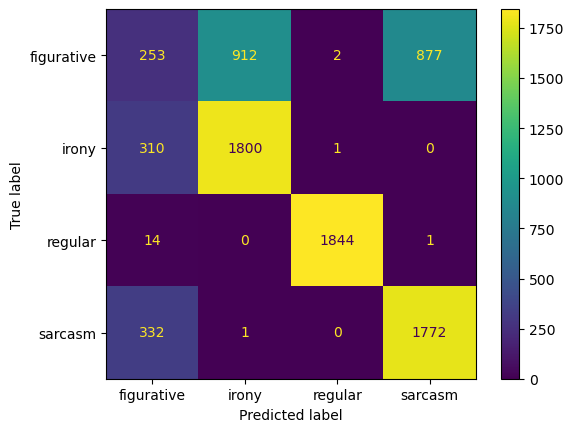

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, pred);

### Pipeline with Decision Tree

In [80]:
dt = DecisionTreeClassifier(random_state=42)

pipe = make_pipeline (preprocessor, dt)
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  ['url', 'tags', 'emojis',
                                                   'num_hashtags',
                                                   'num_special',
                                                   'num_excl_quest', 'n_char',
                                                   'n_words',
                                                   'avg_len_words']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('countvectorizer',
                                                                   CountVectorizer())]),
                                                  'text_all_clean')])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [81]:
params = [{
    'decisiontreeclassifier__criterion':['gini','entropy'],
    'decisiontreeclassifier__max_depth':[2,3,4,5]
}]
gs = GridSearchCV(pipe, params, cv=5, refit=True)
gs.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('maxabsscaler',
                                                                                          MaxAbsScaler())]),
                                                                         ['url',
                                                                          'tags',
                                                                          'emojis',
                                                                          'num_hashtags',
                                                                          'num_special',
                                                                          'num_excl_quest',
                                                                          'n_char',
                                                                          'n_words',
                                                                          'avg_len_words']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('countvectorizer',
                                                                                          CountVectorizer())]),
                                                                         'text_all_clean')])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid=[{'decisiontreeclassifier__criterion': ['gini',
                                                                'entropy'],
                          'decisiontreeclassifier__max_depth': [2, 3, 4, 5]}])

In [82]:
gs.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 4}

In [83]:
dt_scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_macro')
dt_scores

array([0.62713803, 0.57101286, 0.54627143, 0.55515135, 0.56541017])

In [84]:
y_test_pred = gs.predict(X_test)
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

  figurative       1.00      0.00      0.00      2044
       irony       0.67      1.00      0.80      2111
     regular       0.99      1.00      0.99      1859
     sarcasm       0.67      1.00      0.80      2105

    accuracy                           0.75      8119
   macro avg       0.83      0.75      0.65      8119
weighted avg       0.83      0.75      0.64      8119



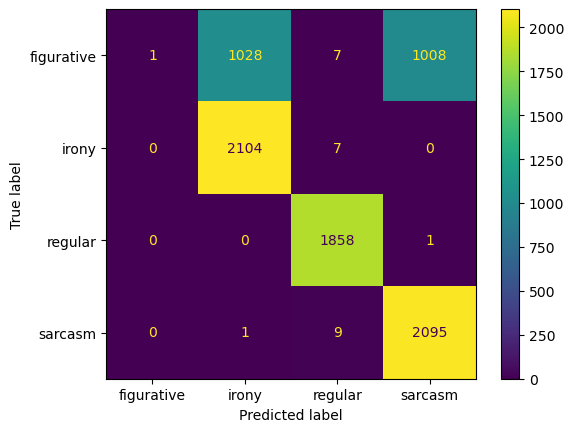

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred);

In [86]:
X_no_text = X.drop("text_all_clean", axis=1)

In [87]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt.fit(X_no_text, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

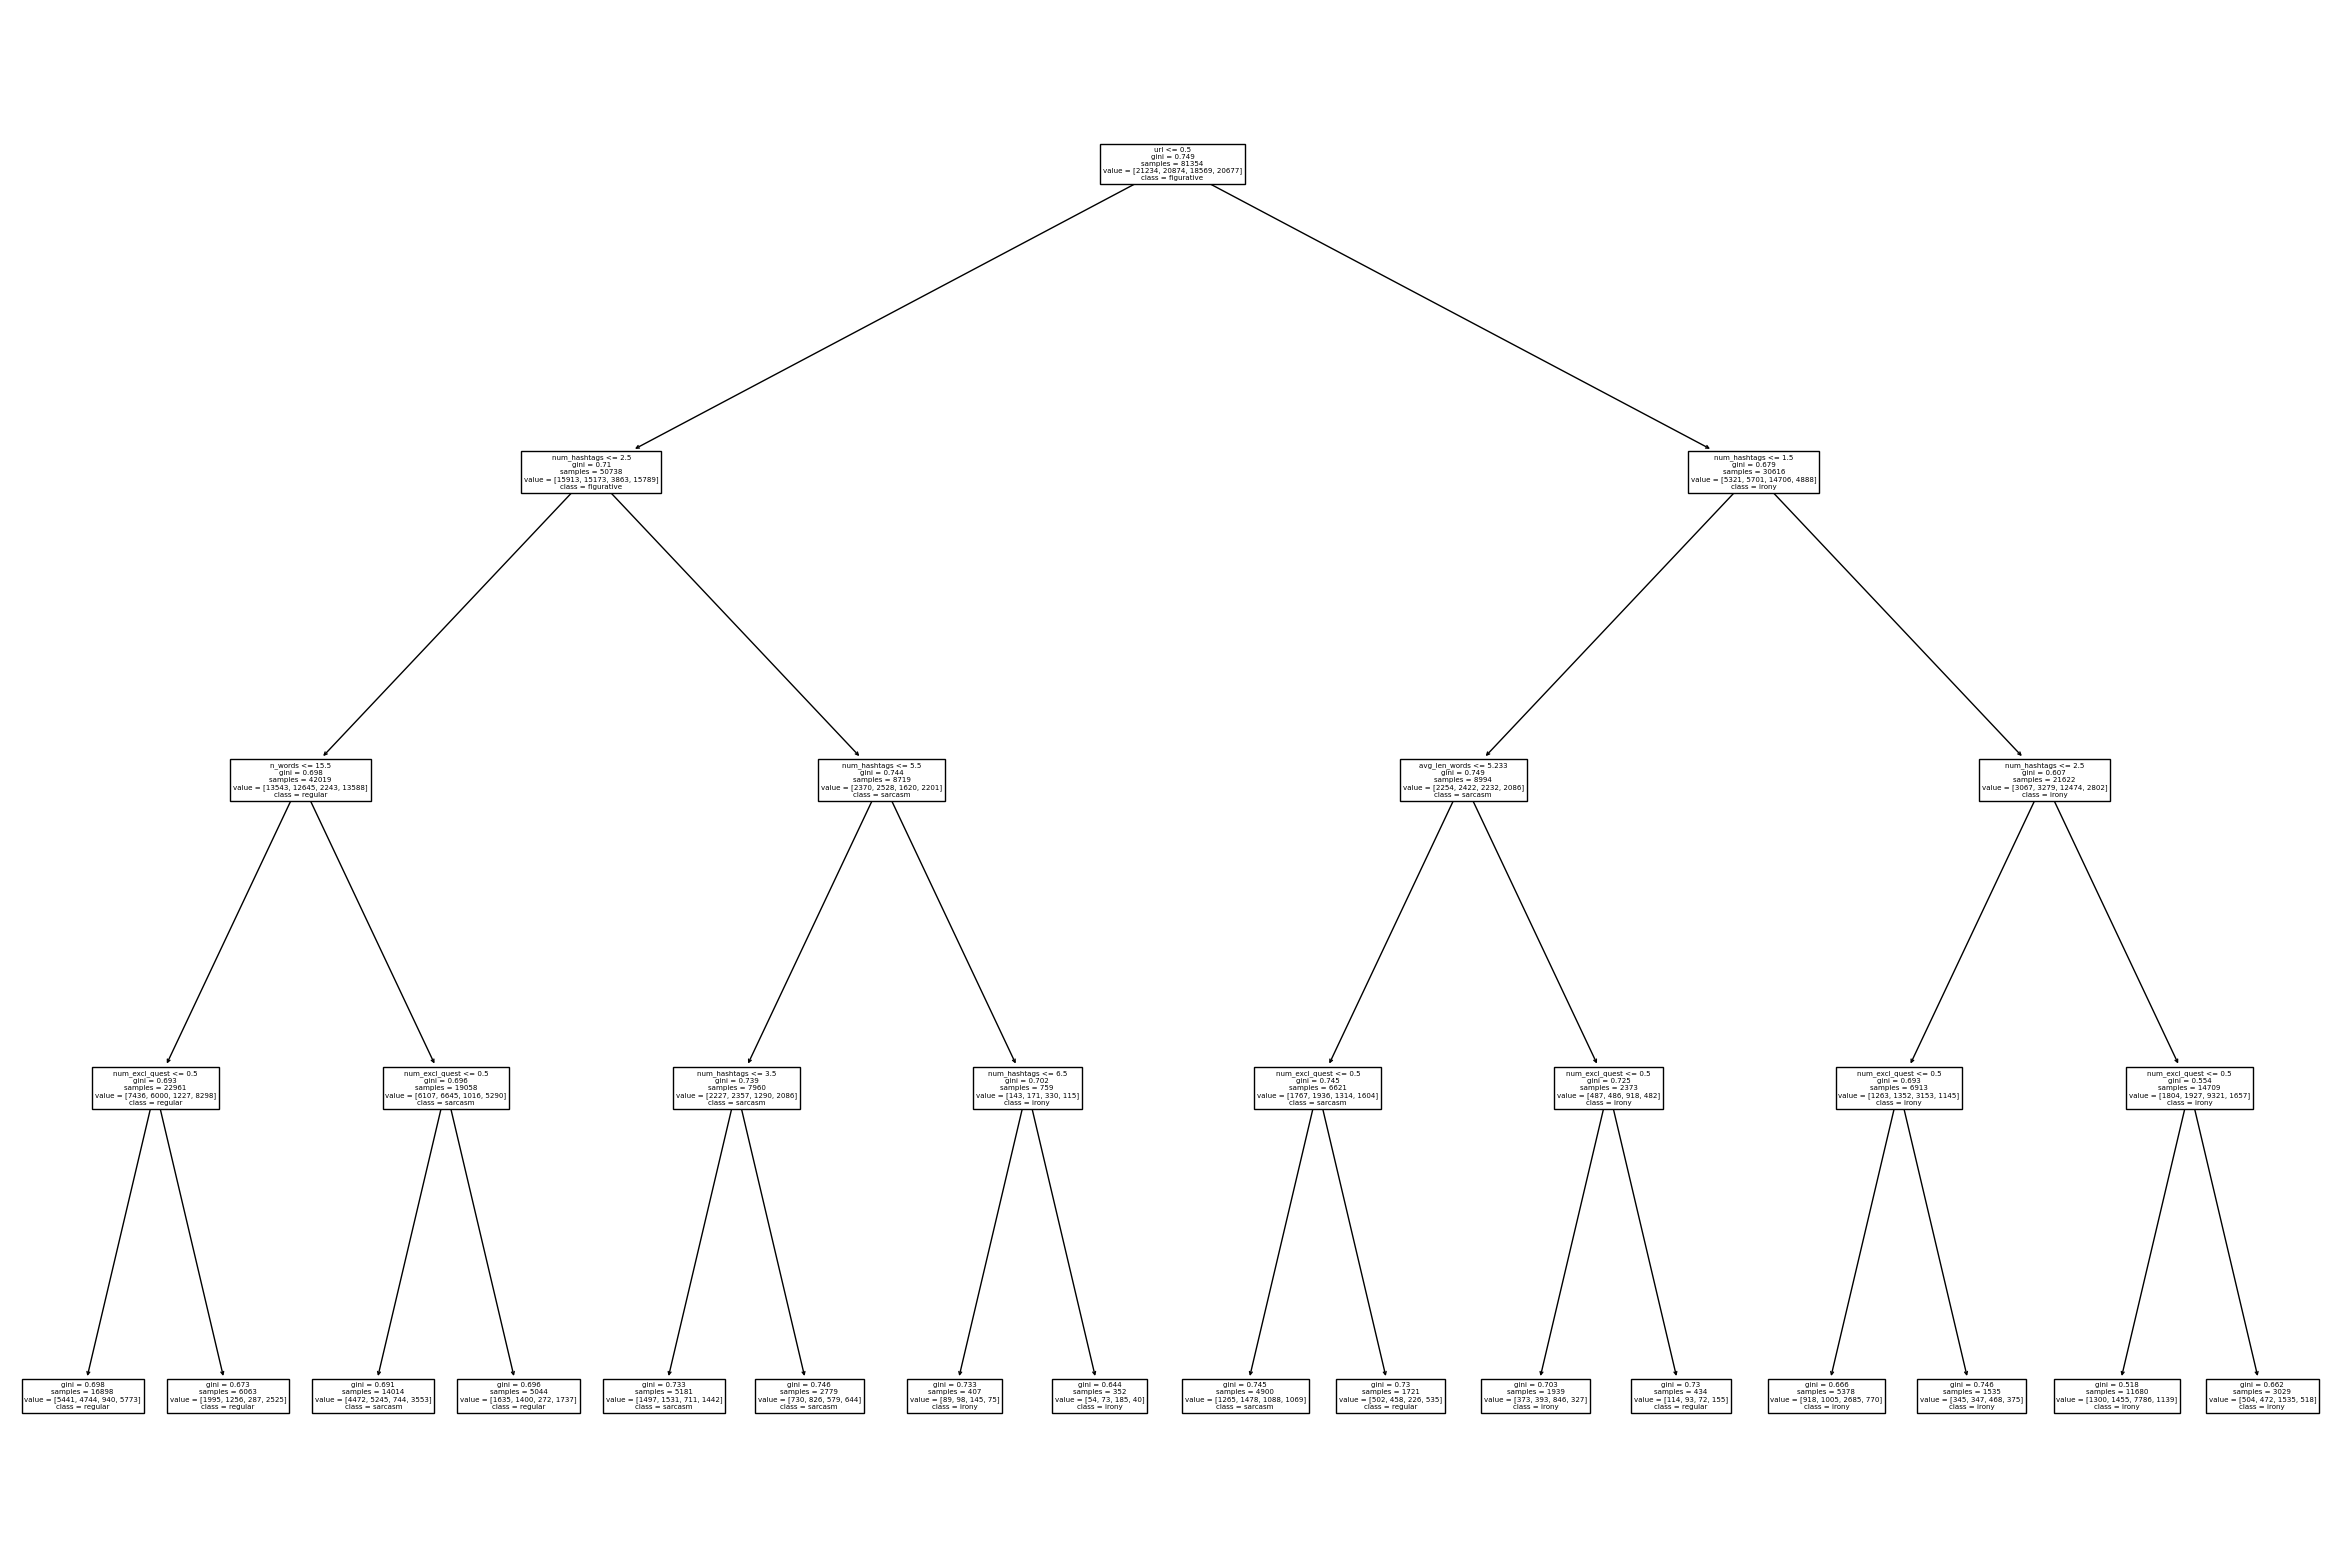

In [89]:
from sklearn import tree 
plt.figure(figsize=(30,20))
tree.plot_tree(dt, feature_names=['url', 'tags', 'num_hashtags', 'emojis', 'num_special', 'num_excl_quest', 'n_char', 'n_words', 'avg_len_words'], class_names=['figurative', 'sarcasm', 'irony', 'regular'])
plt.show()

### Pipeline with Knn

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

pipe = make_pipeline (preprocessor, knn)
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  ['url', 'tags', 'emojis',
                                                   'num_hashtags',
                                                   'num_special',
                                                   'num_excl_quest', 'n_char',
                                                   'n_words',
                                                   'avg_len_words']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('countvectorizer',
                                                                   CountVectorizer())]),
                                                  'text_all_clean')])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [91]:
params = [{
    'kneighborsclassifier__n_neighbors':[2, 3, 4, 5]
}]
gs = GridSearchCV(pipe, params, cv=5, refit=True)
gs.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('maxabsscaler',
                                                                                          MaxAbsScaler())]),
                                                                         ['url',
                                                                          'tags',
                                                                          'emojis',
                                                                          'num_hashtags',
                                                                          'num_special',
                                                                          'num_excl_quest',
                                                                          'n_char',
                                                                          'n_words',
                                                                          'avg_len_words']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('countvectorizer',
                                                                                          CountVectorizer())]),
                                                                         'text_all_clean')])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid=[{'kneighborsclassifier__n_neighbors': [2, 3, 4, 5]}])

In [92]:
gs.best_params_

{'kneighborsclassifier__n_neighbors': 5}

In [93]:
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_macro')
knn_scores

array([0.61745118, 0.59394464, 0.57942153, 0.58319684, 0.59103821])

In [94]:
y_test_pred = gs.predict(X_test)
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

  figurative       0.15      0.15      0.15      2044
       irony       0.55      0.58      0.56      2111
     regular       0.99      0.83      0.90      1859
     sarcasm       0.61      0.69      0.65      2105

    accuracy                           0.56      8119
   macro avg       0.58      0.56      0.57      8119
weighted avg       0.57      0.56      0.56      8119



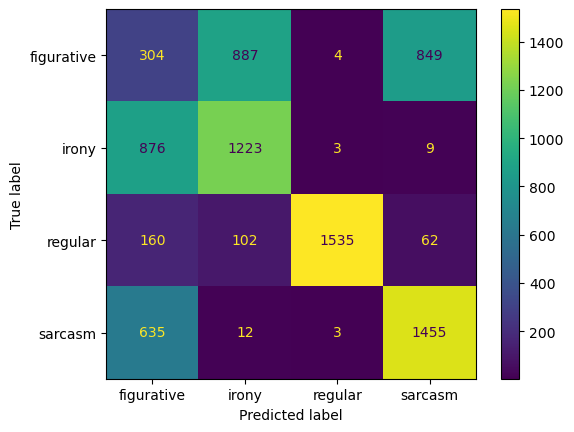

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred);

### Dummy Classifier

In [96]:
from sklearn.dummy import DummyClassifier

In [100]:
dummy_clf = DummyClassifier()
pipe = make_pipeline (preprocessor, dummy_clf)
pipe.fit(X, y)
y_test_pred = pipe.predict(X_test)
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

  figurative       0.25      1.00      0.40      2044
       irony       0.00      0.00      0.00      2111
     regular       0.00      0.00      0.00      1859
     sarcasm       0.00      0.00      0.00      2105

    accuracy                           0.25      8119
   macro avg       0.06      0.25      0.10      8119
weighted avg       0.06      0.25      0.10      8119



c:\Users\lucre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lucre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lucre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Compare different models

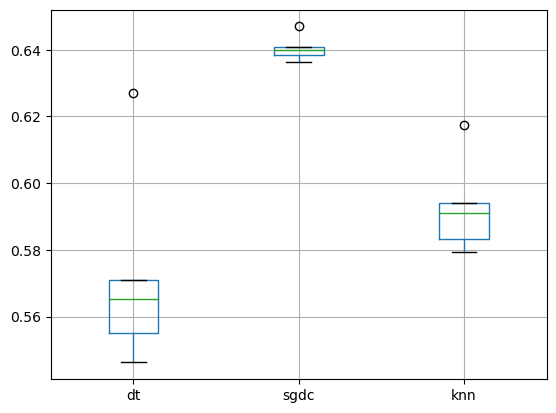

In [98]:
d = {'dt': dt_scores, 'sgdc': sgdc_scores, 'knn': knn_scores}
results = pd.DataFrame(d)
results.boxplot();

### Export dataset

In [99]:
X.to_csv("X_clean.csv", index= None)
y.to_csv("y_clean.csv", index= None)
X_test.to_csv("Xtest_clean.csv", index= None)
y_test.to_csv("ytest_clean.csv", index= None)

In [46]:
df.to_csv("df_all.csv", index= None)
df_test.to_csv("df_test_all.csv", index= None)